In [13]:
from sklearn.cluster import MeanShift, KMeans
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

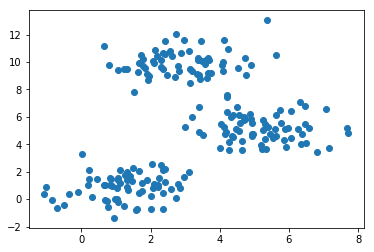

In [30]:
centers = [[1,1],[5,5],[3,10]]
X,_ = make_blobs(n_samples = 200, centers = centers,cluster_std = 1) # creates three cluster data from the centers
plt.scatter(X[:,0],X[:,1])
plt.show()

In [31]:
ms = MeanShift().fit(X) # shows the ideal number of clusters in the data 
labels=ms.labels_

cluster_centers = ms.cluster_centers_
n_clusters = len(np.unique(labels))
print("Number of estimated clusters:",n_clusters)
print(cluster_centers)


Number of estimated clusters: 3
[[5.16465947 5.19026293]
 [1.27491369 0.8862003 ]
 [2.86502442 9.84109227]]


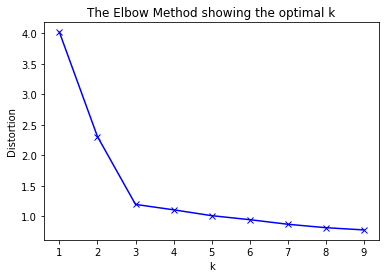

In [14]:
#Alternatively, use the elbow method to detect the ideal number of clusters that lie at the elbow


distortions = []
K = range(1,10)# fit 10 cluster analysis and plot them
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

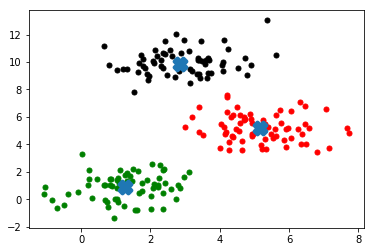

In [32]:
colors = 10*["r.","g.","k."]


for i in range(len(X)):
    plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize = 10)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker = "X",s =140,linewidths = 4,zorder = 10)

In [34]:
#Create the clusters
cluster = KMeans(n_clusters = 3)
cluster.fit(X)
centers = cluster.cluster_centers_
labels = cluster.labels_
print(centers)

print(labels[0 : 20])

[[1.27491369 0.8862003 ]
 [2.9052483  9.97326681]
 [5.16465947 5.19026293]]
[1 0 2 1 0 0 0 2 1 2 1 1 2 0 1 1 2 2 1 2]


In [41]:
#add the clusters to the original data as the labels or targets
# the role of cluster analysis is to help the data scientist find labels for the data.
import pandas as pd
G= pd.DataFrame(X,columns = ["feature1","feature2"])
G["Targets"] = labels
G.head()

,feature1,feature2,Targets
0,3.607494,10.165061,1
1,2.014683,-0.734151,0
2,4.554881,4.991456,2
3,2.886983,10.645916,1
4,2.105639,1.077289,0


In [52]:
# investigate the characteristics of the features
#You can use mean as the explanatory variable
mean = G.groupby("Targets").mean()

mean

,feature1,feature2
Targets,,
0,1.274914,0.886200
1,2.905248,9.973267
2,5.164659,5.190263


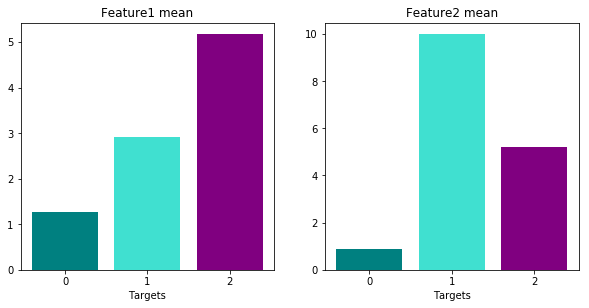

In [63]:
# With the means, You can plot the features to see them better

import matplotlib.pyplot as plt
color = ["teal", "turquoise","purple"]
H = plt.figure(figsize = (10,10))
H.add_subplot(221)
plt.bar(range(3),mean.feature1 , color = color)
plt.title("Feature1 mean")
plt.xlabel("Targets")
plt.xticks(range(3))


H.add_subplot(222)
plt.bar(range(3),mean.feature2 , color = color)
plt.title("Feature2 mean")
plt.xlabel("Targets")
plt.xticks(range(3))

plt.show()

In [65]:
print(" the graphs show that cluster 2 has higher feature1 mean")
print(" the graphs show that cluster 1 has higher feature2 mean")
print(" these can help you create better labels for your data in practise")

 the graphs show that cluster 2 has higher feature1 mean
 the graphs show that cluster 1 has higher feature2 mean
 these can help you create better labels for your data in practise
